In [1]:
#%pip install matplotlib-label-lines

import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import seaborn
from labellines import labelLine, labelLines
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib

plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"] =12


# Import data

In [2]:
mi18=pd.read_excel(os.path.join(os.getcwd(),"helperfiles","MI_kil18.xlsx"))
mi18['MagmaSat_err']=mi18['Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)']-mi18['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']

fi18=pd.read_excel(os.path.join(os.getcwd(),"helperfiles","FI_kil18.xlsx"))
                                                                        
fi23=pd.read_excel("S2_SI_Dataset_revised.xlsx", sheet_name='Final_Raman+SEM')

day1day2=pd.read_excel("S2_SI_Dataset_revised.xlsx", sheet_name='Raman_allreps')

day1=day1day2[day1day2['date'].str.contains('September 20')]
day2_og=day1day2[day1day2['date'].str.contains('September 21|September 20')]

fi23=fi23.drop(columns=fi23.filter(like='Unnamed'))
day1=day1.drop(columns=day1.filter(like='Unnamed'))
day2_og=day2_og.drop(columns=day2_og.filter(like='Unnamed'))

# ##############################################################################

display(day1.head())
display(day2_og.head())
display(fi23.head())


,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,103.080962,0.003307,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,103.115547,0.002087,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,103.106342,0.001666,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,102.760619,0.032383,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,102.911267,0.003343,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,103.080962,0.003307,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,103.115547,0.002087,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,103.106342,0.001666,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,102.760619,0.032383,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,102.911267,0.003343,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Crystal Name,FI Name,Mean of reps?,Density g/cm3,"σ Density g/cm3 (from DiadFit, STD for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_iteration5_min,XH2O_iteration5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_av,XH2O_iteration5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_max,XH2O_iteration5_max,P_mix_max/P_pureCO2
0,K23_101,K23_101_FIC,NaN,0.085665,0.007736,NaN,0.007736,0.006738,0.003801,102.966450,...,0.186487,0.283699,0.053569,1.053743,0.300597,0.107846,1.116509,0.318960,0.160045,1.184715
1,K23_101,K23_101_FID,NaN,0.100137,0.005037,NaN,0.005037,0.003301,0.003805,103.002974,...,0.160422,0.332672,0.046297,1.045784,0.349657,0.093476,1.099175,0.367821,0.138888,1.156277
2,K23_102,K23_102_FIA,NaN,0.112454,0.004482,NaN,0.004482,0.002350,0.003817,103.034058,...,0.141894,0.374628,0.041096,1.040210,0.391640,0.083402,1.087447,0.409664,0.124194,1.137491
3,K23_10,K23_10_FIA,NaN,0.131039,0.004066,NaN,0.004066,0.001310,0.003849,103.080962,...,0.123899,0.424947,0.035974,1.035015,0.442067,0.073697,1.076713,0.460070,0.110177,1.120562
4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,0.003879,103.110944,...,0.110034,0.474808,0.031950,1.030739,0.492191,0.066293,1.068475,0.510410,0.099630,1.108026


# Plot Fig 3 base form

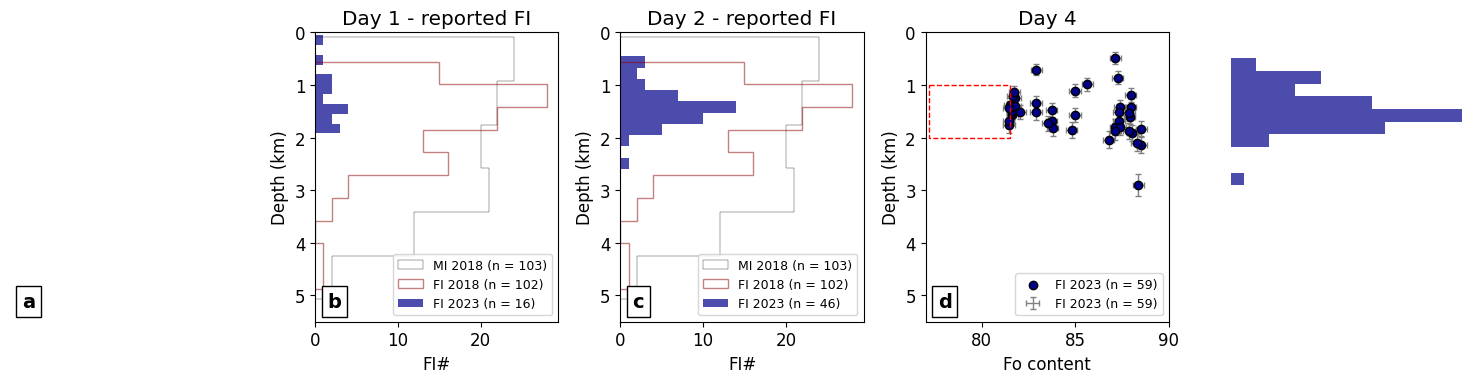

In [5]:
### Here we plot everything together

xmi18='Depth_RL(km)' #'Depth_RL(km)
xfi18='Mean_MC_D_km'#'Mean_MC_D_km'
xfi23_d1d2='Depth_km_ryanlerner'

# Filter for EOS (SO2 less than 5%)

fi23_filt=~(round(fi23['SO2_Diad_Ratio'],2)>0.22)

# Filter for day2 data
day2_og['SO2_Diad_Ratio']=day2_og['SO2_Diad_Ratio'].fillna(0)
day2=day2_og.copy()

degass_filt=day2['SO2_Diad_Ratio']<0.1

day2_out=day2[~(degass_filt)]
day2_in=day2[degass_filt]

figure_mosaic="""
ABCDE
"""

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(15, 4))
val_lim=[5.5, 0]
val_lim_abc=[0,5.5]


fontsize=9
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

orient='horizontal'

# plot MI and FI from 2018 on B,C,D

for ax in ['B','C']:
    axes[ax].hist(mi18[xmi18],bins=10,color='white',edgecolor='k',histtype='step',
                linewidth=0.25,label='MI 2018 (n = '+str(mi18.shape[0])+')', orientation=orient)

    axes[ax].hist(fi18[xfi18],bins=10,color='lightgrey',edgecolor='darkred', histtype='step',
                alpha=0.5, label='FI 2018 (n = '+str(fi18.shape[0])+')', orientation=orient)
    for ax in ['B','C','E']:
        if orient=='horizontal':
            axes[ax].set_ylim(val_lim)
            axes[ax].set_ylabel("Depth (km)")
            axes[ax].set_xlabel("FI#")
        else:
            axes[ax].set_xlim(val_lim_abc)
            axes[ax].set_xlabel("Depth (km)")
            axes[ax].set_ylabel("FI#")

# Plot day1 FI 2023

axes['B'].hist(day1[xfi23_d1d2],bins=10,color='darkblue',alpha=0.7, label='FI 2023 (n = '+str(day1.shape[0])+')', orientation=orient)

axes['C'].hist(day2_in[xfi23_d1d2],bins=10,color='darkblue',alpha=0.7, label='FI 2023 (n = '+str(day2_in.shape[0])+')', orientation=orient)
# axes['C'].hist(day2_out[xfi23_d1d2],bins=10,color='pink',alpha=0.7, label='FI 2023 filtered (n = '+str(day2_out.shape[0])+')', orientation=orient)

###Day 4

Fo_var_fi23='Fo'

fi_data_col='Mean_MC_D_km'
fi_err_col='std_dev_MC_D_km'

## This actually plots data

axes['D'].errorbar(fi23[fi23_filt][Fo_var_fi23]*100, fi23[fi23_filt][fi_data_col], xerr=0.003*100,
                    yerr=fi23[fi23_filt][fi_err_col], 
                    color='grey', 
                    alpha=1,markeredgecolor=None,marker='', ls='none', 
                    barsabove=False, elinewidth=1, capsize=2,zorder=-2,
                    label='FI 2023 (n = '+str(fi23[fi23_filt].shape[0])+')')

axes['D'].scatter(fi23[fi23_filt][Fo_var_fi23]*100, fi23[fi23_filt][fi_data_col],
            marker='o', edgecolor='k',color='darkblue',label='FI 2023 (n = '+str(fi23[fi23_filt].shape[0])+')')

axes['E'].hist(fi23[fi23_filt][fi_data_col],alpha=0.7,density=1,orientation=orient,color='darkblue', bins=10)
axes['D'].set_ylim(val_lim)
axes['D'].set_ylabel("Depth (km)")
axes['D'].set_xlabel("Fo content")
axes['D'].set_xlim([77,90])

axes['E'].set_axis_off()
#### PLOT SETTINGS ######################################################
subplot_labels = ['A','B','C','D',]
pos_a2h=(0.05,0.05)
label_positions = [pos_a2h,pos_a2h,pos_a2h,pos_a2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)

### SAVE FIG##############################################################
axes['B'].set_title("Day 1 - reported FI")
axes['C'].set_title("Day 2 - reported FI")
axes['D'].set_title("Day 4")

# Calculated equilibrium Fo range from EPMA glass data and 17% Fe3+ (Lerner et al., 2021)
x_min = 77.17
x_max = 81.5

# Define the y-range for the box
y_min = 1
y_max = 2

# Create a box using a Rectangle patch
box = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='red', linestyle='dashed')
# axes['D'].plot([87,87],[5,0])
# Add the box to the subplot
axes['D'].add_patch(box)

for ax in ['B','C','D']:
    axes[ax].legend(loc='lower right',fontsize=fontsize)
axes['A'].set_axis_off()
plt.tight_layout()

plt.rcParams["pdf.fonttype"]=42

# fig.savefig(os.getcwd()+'/'+"Fig3_base.pdf")
directory=os.path.join(os.getcwd(), 'Main Figs')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Main Figs', f'Fig1_base.pdf'))
